Best-fit parameters: [2.31082692 1.77456691]
Minimum chi-squared: 10.91919812391427


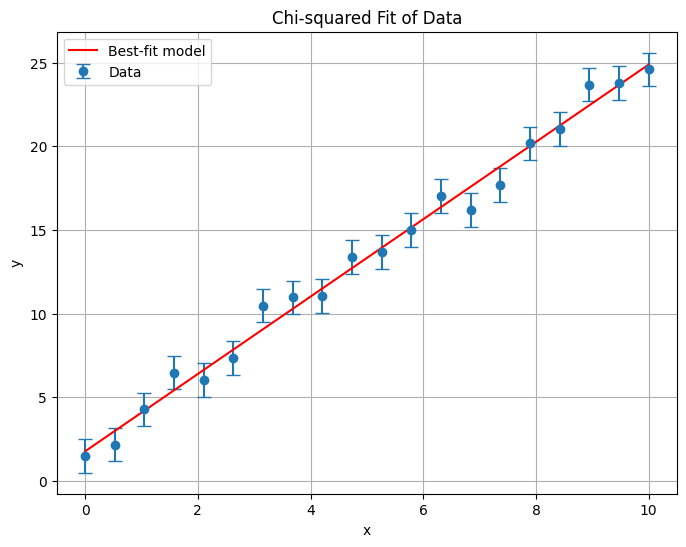

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

def chi_squared(params, model, x, y, sigma):
    """
    Calculate the chi-squared value for a given set of parameters.
    
    Parameters:
        params (array-like): Model parameters.
        model (function): The model function, must accept x and parameters.
        x (array-like): Independent variable data.
        y (array-like): Dependent variable (observations).
        sigma (array-like): Uncertainties in the observations.
    
    Returns:
        float: The chi-squared value.
    """
    y_model = model(x, *params)
    chi2 = np.sum(((y - y_model) / sigma) ** 2)
    return chi2

def chi2_fit(model, x, y, sigma, initial_guess):
    """
    Fit a model to data by minimizing the chi-squared statistic.
    
    Parameters:
        model (function): The model function.
        x (array-like): Independent variable data.
        y (array-like): Dependent variable data.
        sigma (array-like): Uncertainties in y.
        initial_guess (array-like): Initial guess for the parameters.
    
    Returns:
        dict: A dictionary with the best-fit parameters and the minimum chi2.
    """
    result = minimize(chi_squared, initial_guess, args=(model, x, y, sigma))
    if result.success:
        return {"best_fit_params": result.x, "chi2_min": result.fun}
    else:
        raise RuntimeError("Optimization failed: " + result.message)

# Define a simple linear model: y = m*x + b
def linear_model(x, m, b):
    return m * x + b

# Generate synthetic data for testing
np.random.seed(42)  # for reproducibility
x_data = np.linspace(0, 10, 20)
true_params = [2.5, 1.0]
y_clean = linear_model(x_data, *true_params)
sigma_data = np.full_like(x_data, 1.0)  # constant uncertainty for each point
y_data = y_clean + np.random.normal(0, sigma_data)  # add noise

# Perform the chi2 fit with an initial guess for [m, b]
initial_guess = [1.0, 0.0]
fit_results = chi2_fit(linear_model, x_data, y_data, sigma_data, initial_guess)

print("Best-fit parameters:", fit_results["best_fit_params"])
print("Minimum chi-squared:", fit_results["chi2_min"])

# Plotting the data and the best-fit model
plt.figure(figsize=(8, 6))

# Plot data with error bars
plt.errorbar(x_data, y_data, yerr=sigma_data, fmt='o', label='Data', capsize=5)

# Generate smooth x values for plotting the fitted model
x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = linear_model(x_fit, *fit_results["best_fit_params"])

# Plot the best-fit model line
plt.plot(x_fit, y_fit, 'r-', label='Best-fit model')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Chi-squared Fit of Data')
plt.legend()
plt.grid(True)
plt.show()